# Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ingest_raw_data():
    path = Path()
    i = 1
    d = {}
    for file in path.glob('raw_data/*.csv'):
        d[str(i)] = pd.read_csv(file)
        print(f'Loaded df{str(i)}: {file}')
        i += 1
    return d

In [3]:
d = ingest_raw_data()

Loaded df1: raw_data\sample_submission.csv
Loaded df2: raw_data\test.csv
Loaded df3: raw_data\train.csv


In [4]:
test = d['2'][:]

In [5]:
train = d['3'][:]

In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

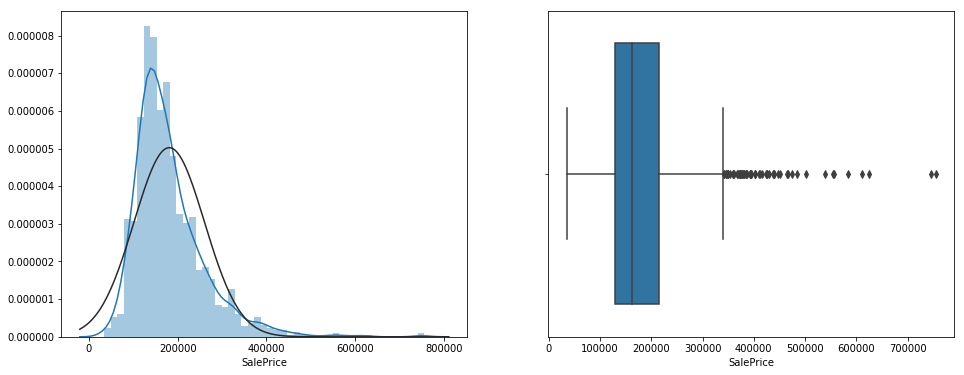

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529
--------------------------------------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [10]:
f,ax = plt.subplots(1,2,figsize=(16,6))
sns.distplot(train['SalePrice'],fit=norm,ax=ax[0])
sns.boxplot(train['SalePrice'])
plt.show()

#skewness and kurtosis
print("Skewness: {}".format(train['SalePrice'].skew()))
print("Kurtosis: {}".format(train['SalePrice'].kurt()))
print("--------------------------------------")
print(train['SalePrice'].describe())

### Simetria

A obliquidade mede a assimetria das caudas da distribuição. Distribuições assimétricas que tem uma cauda mais "pesada" que a outra apresentam obliquidade. Distribuições simétricas tem obliquidade zero. Assim:

- Se v>0, então a distribuição tem uma cauda direita (valores acima da média) mais pesada
- Se v<0, então a distribuição tem uma cauda esquerda (valores abaixo da média) mais pesada
- Se v=0, então a distribuição é aproximadamente simétrica (na terceira potência do desvio em relação à média).

### Curtosi

Em estatística descritiva, a curtose é uma medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade

- Se o valor da curtose for = 3, então tem o mesmo achatamento que a distribuição normal. Chama-se a estas funções de mesocúrticas
- Se o valor é > 3, então a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal. Diz-se que esta função probabilidade é leptocúrtica, ou que a distribuição tem caudas pesadas (o significado é que é relativamente fácil obter valores que não se aproximam da média a vários múltiplos do desvio padrão)
- Se o valor é < 3, então a função de distribuição é mais "achatada" que a distribuição normal. Chama-se-lhe platicúrtica

In [11]:
df_all_corr = train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0":"Feature 1", "level_1":"Feature 2", 0:'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'SalePrice']

,Feature 1,Feature 2,Correlation Coefficient
0,SalePrice,SalePrice,1.000000
47,SalePrice,OverallQual,0.790982
49,SalePrice,GrLivArea,0.708624
58,SalePrice,GarageCars,0.640409
62,SalePrice,GarageArea,0.623431
66,SalePrice,TotalBsmtSF,0.613581
71,SalePrice,1stFlrSF,0.605852
88,SalePrice,FullBath,0.560664
102,SalePrice,TotRmsAbvGrd,0.533723
105,SalePrice,YearBuilt,0.522897


In [15]:
df_train_corr = train.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
df_train_corr.rename(columns={'level_0':'Feature_1', 'level_1':'Feature_2', 0:'Correlation'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation']==1.0].index)
corr = df_train_corr_nd['Correlation'] > 0.1
df_train_corr_nd[corr].head(20)

,Feature_1,Feature_2,Correlation
38,GarageCars,GarageArea,0.882475
40,GarageYrBlt,YearBuilt,0.825667
42,GrLivArea,TotRmsAbvGrd,0.825489
44,1stFlrSF,TotalBsmtSF,0.819530
46,OverallQual,SalePrice,0.790982
48,GrLivArea,SalePrice,0.708624
50,2ndFlrSF,GrLivArea,0.687501
52,BedroomAbvGr,TotRmsAbvGrd,0.676620
54,BsmtFullBath,BsmtFinSF1,0.649212
56,GarageYrBlt,YearRemodAdd,0.642277


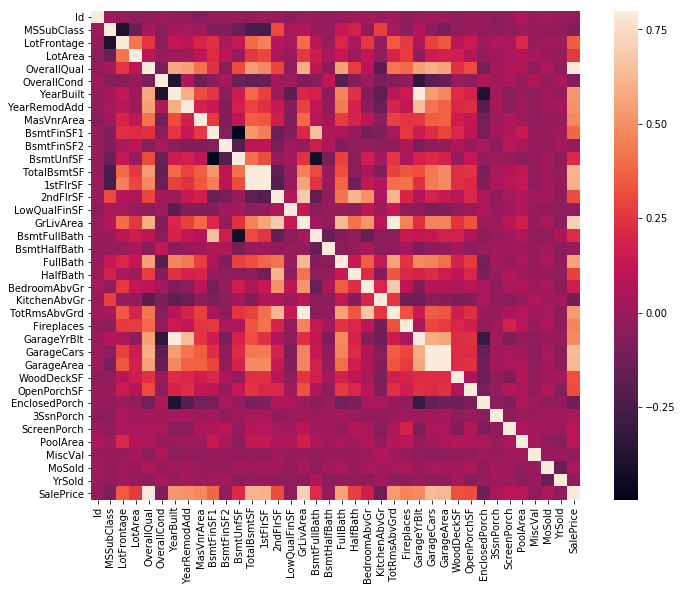

In [19]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

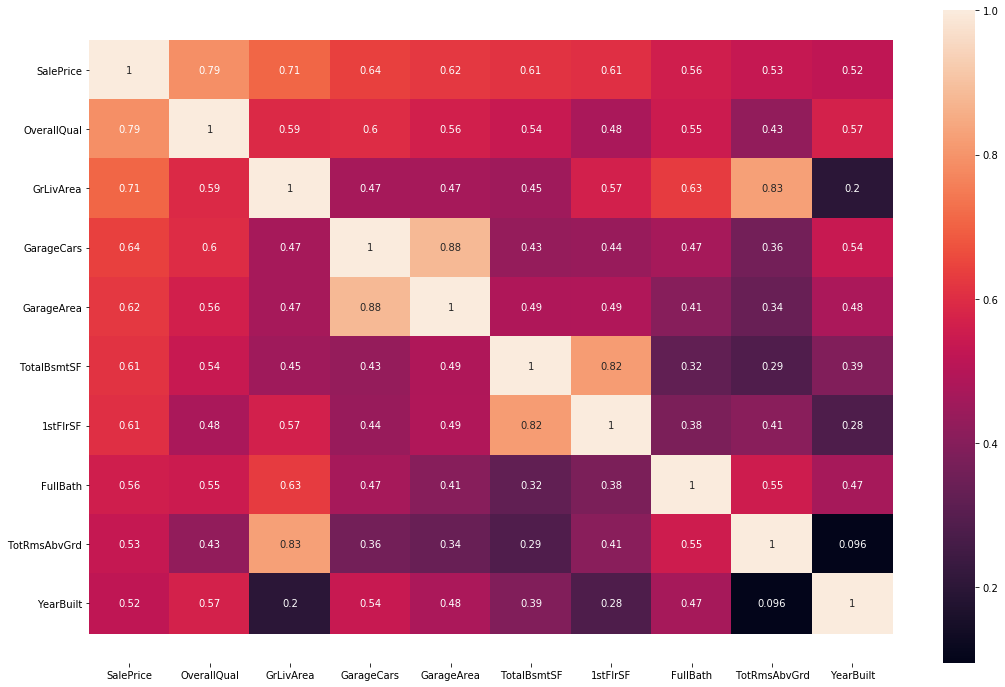

In [20]:
# Correlation of top 10 feature with saleprice
corWithSalePrice = train.corr().nlargest(10,'SalePrice')['SalePrice'].index
f , ax = plt.subplots(figsize = (18,12))
ax = sns.heatmap(train[corWithSalePrice].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

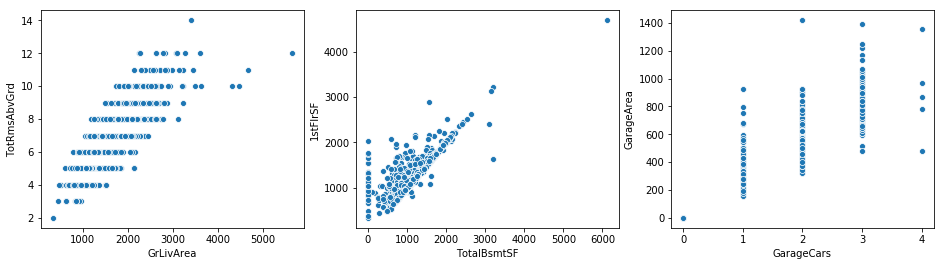

In [25]:
f,ax = plt.subplots(1,3,figsize=(16,4))
sns.scatterplot('GrLivArea','TotRmsAbvGrd',data=train,ax=ax[0])
sns.scatterplot('TotalBsmtSF','1stFlrSF',data=train,ax = ax[1])
sns.scatterplot('GarageCars','GarageArea',data=train,ax = ax[2])
plt.show()

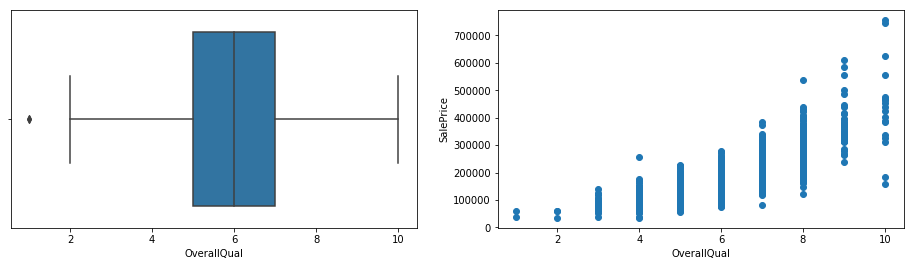

In [12]:
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train['OverallQual'],ax=ax[0])
plt.scatter(train['OverallQual'],train['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

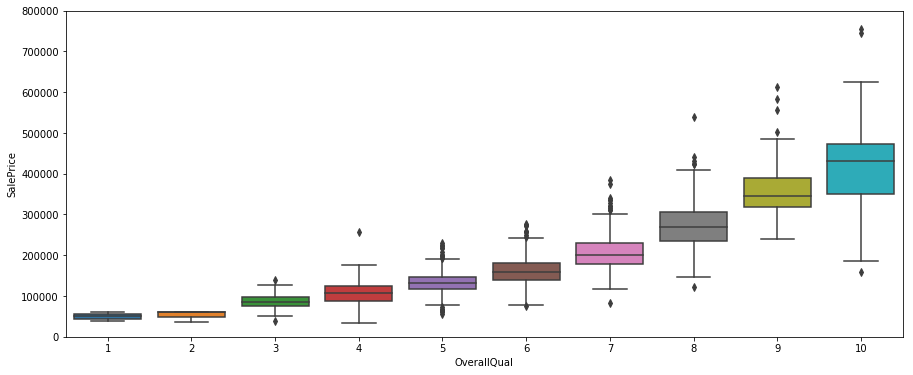

In [23]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

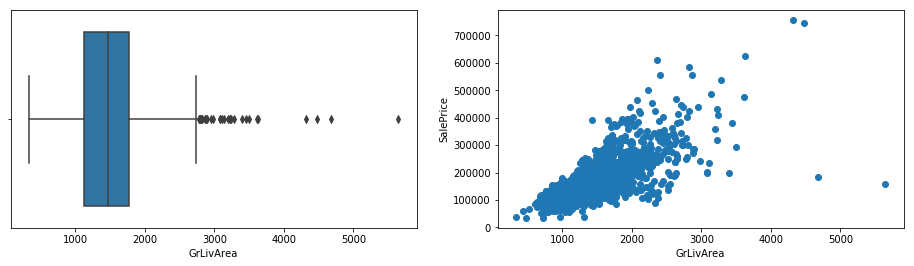

In [21]:
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train['GrLivArea'],ax=ax[0])
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

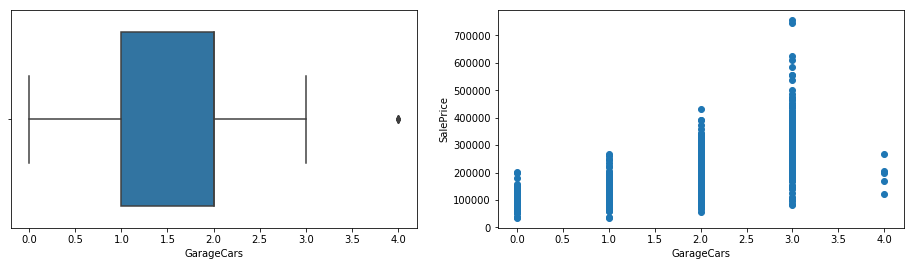

In [14]:
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train['GarageCars'],ax=ax[0])
plt.scatter(train['GarageCars'],train['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

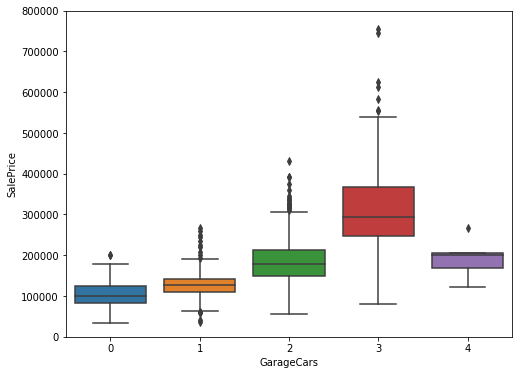

In [24]:
data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

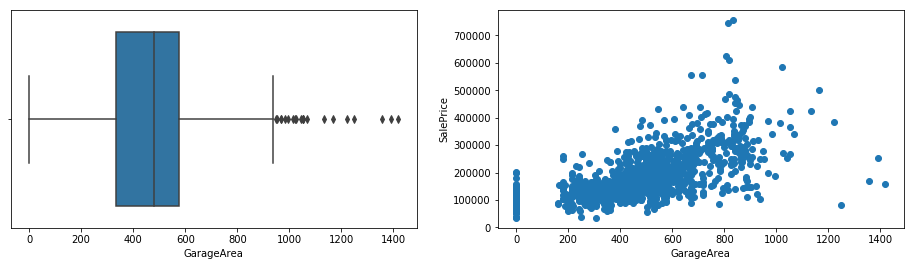

In [15]:
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train['GarageArea'],ax=ax[0])
plt.scatter(train['GarageArea'],train['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

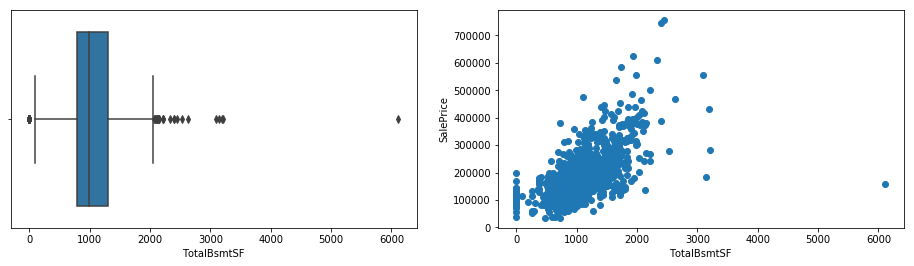

In [16]:
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.boxplot(train['TotalBsmtSF'],ax=ax[0])
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

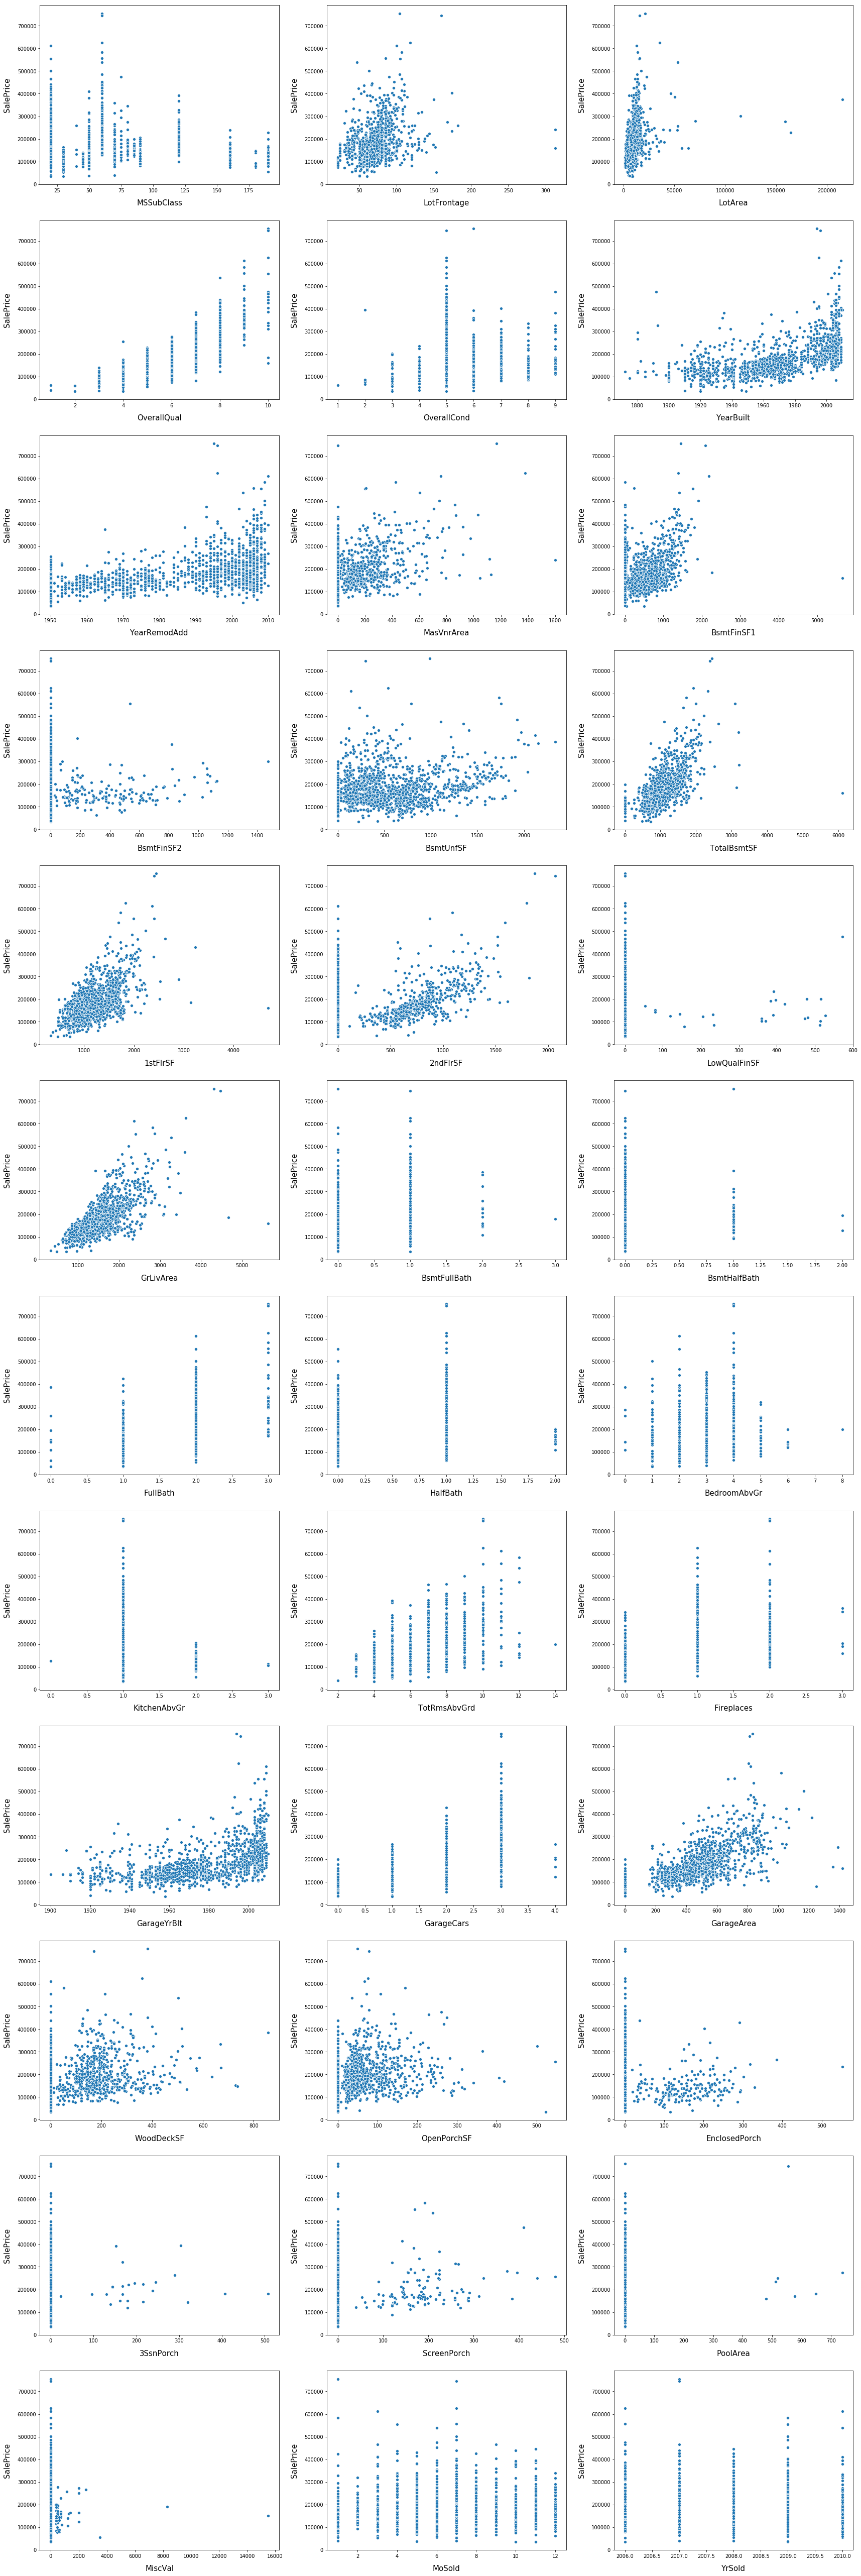

In [17]:
# Finding numeric features
numeric_cols = train.select_dtypes(exclude='object').columns
numeric_cols_length = len(numeric_cols)  

fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

# skiped Id and saleprice feature
for i in range(1,numeric_cols_length-1):
    feature = numeric_cols[i]
    plt.subplot(numeric_cols_length, 3, i)
    sns.scatterplot(x=feature, y='SalePrice', data=train)
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
           
plt.show()

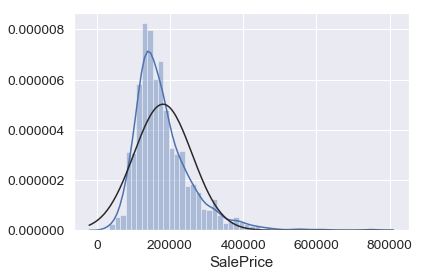

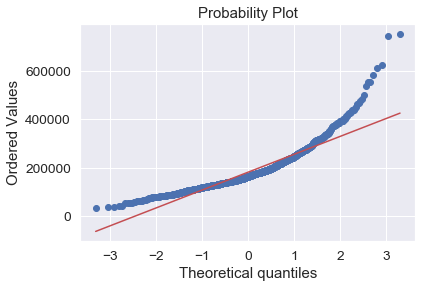

In [73]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [76]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

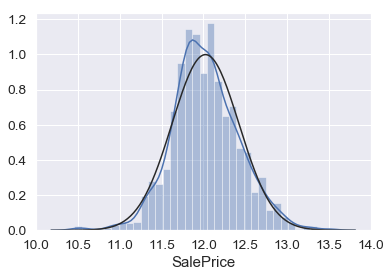

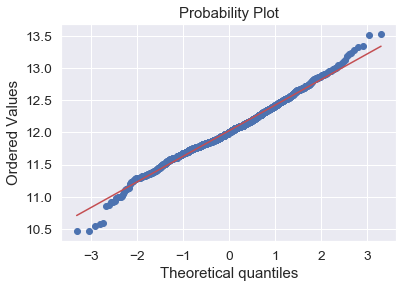

In [77]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [26]:
def remove_overfit_features(df,weight):
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > weight:
            overfit.append(i)
    overfit = list(overfit)
    return overfit

overfitted_features = remove_overfit_features(train,99)

In [27]:
overfitted_features

['Street', 'Utilities', 'PoolArea']